In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv("ml-latest-small/ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
ratings_movies = pd.merge(ratings, movies, on='movieId')
ratings_movies

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


Text(0.5, 1.0, 'Missing Values')

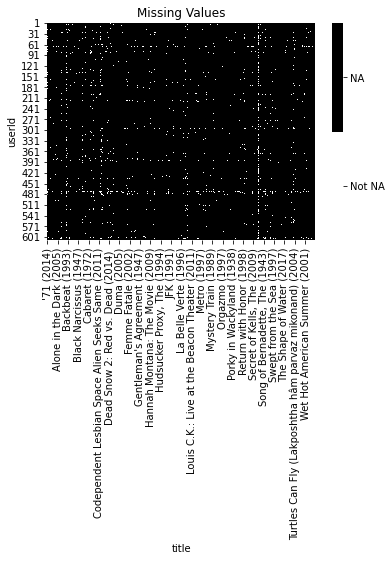

In [5]:
user_movie_matrix = pd.pivot_table(ratings_movies, values='rating', index="userId", columns='title')
display(user_movie_matrix)

ax = sns.heatmap(user_movie_matrix.isna(), cmap=[(1, 1, 1), (0, 0, 0)])

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['Not NA', 'NA'])

plt.title('Missing Values')

### Iterative Soft-Thresholded SVD Approach

In [6]:
from numpy.linalg import svd
from sklearn.metrics import mean_squared_error

In [7]:
def soft_thresholding(x, soft_threshold = 10):
    # soft thresholding
    squarer = lambda xi: 0 if xi < soft_threshold else np.sign(xi) * (abs(xi) - soft_threshold)
    vfunc = np.vectorize(squarer)
    return vfunc(x)

In [8]:
# initialization

completed_mat = user_movie_matrix.fillna(0).values
current_estimate = np.zeros_like(completed_mat)

# estimate projection matrix condition
est_proj = ~np.isnan(user_movie_matrix.values)

In [9]:
difference = []

for _ in range(50):
    
    # complete matrix
    X_hat = completed_mat + current_estimate
    
    # SVD composition
    u, s, vT = np.linalg.svd(X_hat, full_matrices=False)
    
    # update the estimate by soft thresholding
    new_s = soft_thresholding(s, soft_threshold = 10)
    new_estimate = np.dot(u * new_s, vT)
    
    # projection matrix of estimate
    new_estimate[est_proj] = 0
    
    if _%2 == 0:
        # check the convergence
        difference += [mean_squared_error(new_estimate, current_estimate)]
    
    current_estimate = new_estimate

Text(0.5, 0, 'iter')

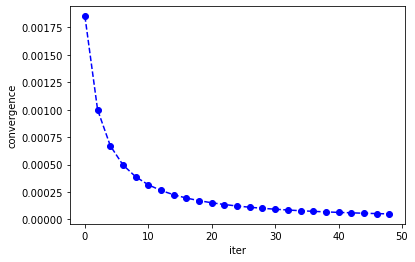

In [10]:
plt.plot([*range(0,50,2)], difference, '--bo')
plt.ylabel('convergence')
plt.xlabel('iter')

In [12]:
X_hat = pd.DataFrame(completed_mat + current_estimate)
X_hat.columns = user_movie_matrix.columns
X_hat

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,-0.117595,0.186798,0.309171,0.050425,0.092212,0.036416,2.489720,0.001673,-0.392902,1.025253,...,0.089286,0.275516,0.031605,0.089226,-0.028156,1.937042,0.477043,0.058615,4.000000,0.226609
1,0.028294,-0.036866,-0.034442,-0.196542,-0.213150,-0.008592,-0.002397,-0.030549,1.386138,0.065444,...,0.034897,0.109266,0.321377,-0.042846,0.201190,-0.116617,0.020101,0.136127,0.884696,-0.058149
2,0.198637,0.140040,0.568075,0.337179,0.294212,-0.015512,1.051009,-0.041121,0.129423,-0.081819,...,0.035803,0.564994,0.076747,0.175096,-0.019334,0.334815,-0.332961,0.212326,0.285820,0.166503
3,0.050005,0.038406,-0.011304,0.203361,0.498820,-0.080233,1.165495,0.149159,0.494887,0.684460,...,0.020365,-0.610462,-0.180564,-0.073201,-0.061524,1.972017,0.100656,-0.064720,1.286239,0.036801
4,-0.019530,-0.029725,-0.057568,0.008086,0.041512,-0.023166,0.003140,0.019873,0.120658,0.087531,...,-0.004467,-0.086474,-0.055646,-0.018558,-0.078783,0.180764,-0.148873,0.044930,0.048547,-0.005460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.028887,0.285410,0.226830,0.695074,1.072960,0.023365,1.203115,0.685083,1.216266,1.077391,...,0.053772,0.437552,-0.142314,-0.076048,-0.115365,3.443778,2.017060,0.132259,1.673405,0.065762
606,-0.035028,0.034632,0.073718,-0.002136,0.082844,-0.080999,1.686507,0.049151,0.656925,1.093731,...,-0.039115,1.194523,0.327148,0.065559,-0.033013,1.657883,0.541748,0.315249,1.883545,0.193651
607,0.302133,-0.022665,0.061782,0.220684,0.232654,0.032709,1.698135,0.144071,1.660601,1.759035,...,0.080237,1.881569,0.767407,0.473665,-0.158685,4.500000,3.500000,0.779969,1.698493,-0.003123
608,-0.010351,0.057291,0.006199,-0.166683,-0.209347,0.010280,-0.224690,0.018734,-0.402692,0.328936,...,-0.003984,0.136746,0.107618,-0.021983,0.009057,0.326976,-0.130105,0.064070,-0.221322,0.003110
